## 1 часть (зной/Пень)

In [1]:
Data1 = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя"
Data2 = "абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ"
FirstWord = "зной"
SecondWord = "Пень"

In [2]:
import time
import random

Перебор по нахождению первого слова

In [19]:
def Dummy(Word,Data):
    result = ""
    for j in Word:
        for i in Data:
            if i==j:
                result = result + i;
    return result
def RandomSort(Word,Data):
    result = ""
    while result != Word:
        if len(result) > 3:
            result=""
        result = result + Data[random.randint(0,32)]
    return result

In [4]:
start=time.time()
# result = Dummy(FirstWord,Data1)
result = RandomSort(FirstWord,Data1)
end = time.time()
print("Время выполнения программы = ", end-start, " c")
print(result)

Время выполнения программы =  4.4960198402404785  c
зной


Перебор по нахождению второго слова

In [5]:

start=time.time()
result = Dummy(SecondWord,Data2)
# result = RandomSort(SecondWord,Data2)
end = time.time()
print("Время выполнения программы = ", end-start, " c")
print(result)

Время выполнения программы =  0.00037741661071777344  c
Пень


## Геналгоритм

### Класс особи

In [3]:
class Unit():
    
    genom = ""
    fitness = 0;
    
    def setGenom(self,genom):
        self.genom = genom
    
    def getGenom(self):
        return self.genom
    
    #Метод рождения особи
    def bear(self,numberOfGens,geneticMaterial):
        for i in range(0,numberOfGens):
            self.genom+=(geneticMaterial[random.randint(0,len(geneticMaterial)-1)])
    
    def Fitness(self,Word):
        count=0
        self.fitness=0
        for i in self.getGenom():
            if i == Word[count]:
                self.fitness+=1
            count+=1
        return self.fitness

### Функции жизненного цикла особей

In [4]:
import random

# Мутация 
def Mutation(unit,geneticMaterial):
    mutatuionRate = 3/len(unit.genom)# Вероятность мутации
    for i in unit.getGenom():
        newData = geneticMaterial.replace(i,"")
        if random.random() < mutatuionRate:
            unit.setGenom(unit.getGenom().replace(i,newData[random.randint(0,len(newData)-1)]))


#Кроссинговер одноточечный
def Coupling1(unit1,unit2):
    srez = random.randint(1,len(unit1.getGenom())-1)
    child1 = Unit()
    child2 = Unit()
    if random.random()>0:
        child1.setGenom(unit1.getGenom()[0:srez] + unit2.getGenom()[srez:len(unit2.getGenom())])
        child2.setGenom(unit2.getGenom()[0:srez] + unit1.getGenom()[srez:len(unit2.getGenom())])
    else:
        child1.setGenom(unit1.getGenom())
        child2.setGenom(unit2.getGenom())
    return child1, child2

#Кроссинговер двухточечный
def Coupling2(unit1,unit2):
    srez1 = random.randint(1,len(unit1.getGenom())//2)
    srez2 = random.randint(len(unit1.getGenom())//2,len(unit1.getGenom())-1)
    child1 = Unit()
    child2 = Unit()
    child1.setGenom(unit1.getGenom()[0:srez1] + unit2.getGenom()[srez1:srez2]+unit1.getGenom()[srez2:len(unit1.getGenom())])
    child2.setGenom(unit2.getGenom()[0:srez1] + unit1.getGenom()[srez1:srez2]+unit2.getGenom()[srez2:len(unit1.getGenom())])
    return child1, child2

# Метод для ранжирования популяции  
def Ranking(Population,Word):
    for i in Population[1:]:
        ind = Population.index(i)
        count = 1
        for j in Population[:ind][::-1]:
            ind = Population.index(i)
            if i.Fitness(Word)>j.Fitness(Word):
                Population[ind-count] = i
                Population[ind] = j
    return Population

#Создание популяции
def CreatePopulation(NumberOfUnits,Data,Word):
    Population =[]
    for i in range(1,NumberOfUnits+1):
        unit = Unit()
        unit.bear(len(Word),Data1)
        Population.append(unit)
    return Population

#Селекция элитарная (усечением)
def EliteSelection(Population, typeOfCoupling):
    
    elite = Population[:int(0.4*len(Population))]
                            
    while len(elite) != 0:
            first = random.choice(elite)
            elite.remove(first)
            second = random.choice(elite)
            elite.remove(second)
            Population.remove(first)
            Population.remove(second)
            if typeOfCoupling == 1:
                first,second = Coupling1(first,second)
            elif typeOfCoupling == 2: 
                first,second = Coupling2(first,second)
            Population.append(first)
            Population.append(second)    
    return Population

def KillTheWeak(Population,weakNumber,Data,Word):
    for i in range(0,weakNumber+1):
        Population.pop(-weakNumber-1+i)
        unit = Unit()
        unit.bear(len(Word),Data)
        Population.append(unit)
    return Population

#Селекция рулетка:
def RouletteSelection(Population,Word):
    midPopulation = Population
    NewPopulation = []
    NewPopulation.append(Population[0])
    NewPopulation.append(Population[1])
    cnt = 0
    while cnt!=len(Population)-2:
        print(cnt)
        Couple = []
        probability = []
        for i in Population:
            probability.append(i.Fitness(Word))
        summa=0
        print(probability)
        for i in probability:
            summa+=i
        d = random.random()*summa
        count = 0;
        for i in range(0,len(probability)):
            count+=probability[i]
            if count > d:
                if len(Couple)>0:
                    Couple.append(midPopulation[i-1])
                else:
                    Couple.append(Population[i])
                    midPopulation.pop(i)
                    for i in midPopulation:
                        print(i.getGenom(),i.Fitness(Word))
                    print("-----------------------")
#                 if not (Population[probability.index(i)] in Couple):
#                     Couple.append(Population[probability.index(i)])
        
        if len(Couple) == 2:
            midPopulation = Population
            first,second = Coupling2(Couple[0],Couple[1])
            NewPopulation.append(first)
            NewPopulation.append(second)
            Couple =[]
            cnt+=2
            
    return NewPopulation
            

In [82]:
import time
#Начало жизни
def Life(Word,Data,mutationStart,typeOfCoupling,isKill):    
    start = time.time()
    stop = False
    Population = CreatePopulation(10,Data,Word)
    Population = Ranking(Population,Word)
    count = 0
    while not stop:
        
        for i in range(mutationStart,len(Population)):
            Mutation(Population[i],Data) 
            
        Population = EliteSelection(Population,typeOfCoupling)
#         Population = RouletteSelection(Population,Word)
        
        Population = Ranking(Population,Word) 
        
        if isKill:
            Population = KillTheWeak(Population,4,Data,Word)
        
#         for i in Population:
#             print(i.getGenom(),i.Fitness(Word))
#         print("-----------------------")
        
        count+=1
    
        if Population[0].Fitness(Word) == len(Word):
            end = time.time()
            stop = True

#     print("Количество поколений", count)
#     print("Время выполнения программы = ", end-start, " c") 
#     print("Угаданное слово - ", Population[0].getGenom())
#     for i in Population:
#         print(i.getGenom(), i.Fitness(Word))
#     print("-----------------------")
    
#     return Population[0].getGenom()     
    return end-start

# 20 проходов алгоритма первое слово

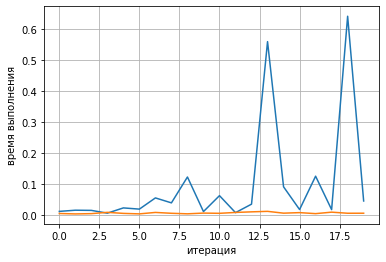

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
timeOfCalculation1 = []
timeOfCalculation2 = []
x = []
for i in range (0,20):
    timeOfCalculation1.append(Life(FirstWord,Data1,5,2,True)) ## Весрия с двухточечным кроссинговером - синим цветом
    x.append(i)
    
for i in range (0,20):
    timeOfCalculation2.append(Life(FirstWord,Data1,5,1,True)) ## Весрия с одноточечным кроссинговером - рыжим

plt.plot(x,timeOfCalculation1,x,timeOfCalculation2)
plt.xlabel("итерация") # ось абсцисс
plt.ylabel("время выполнения") # ось ординат
plt.grid()

    

# 20 проходов алгоритма второе слово

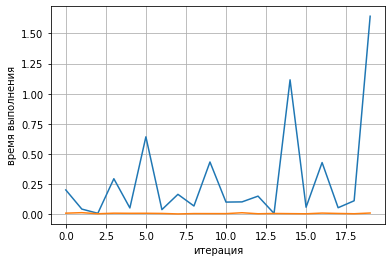

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
timeOfCalculation1 = []
timeOfCalculation2 = []
x = []
for i in range (0,20):
    timeOfCalculation1.append(Life(SecondWord,Data2,5,2,True)) ## Весрия с двухточечным кроссинговером - синим цветом
    x.append(i)
    
for i in range (0,20):
    timeOfCalculation2.append(Life(SecondWord,Data2,5,1,True)) ## Весрия с одноточечным кроссинговером - рыжим

plt.plot(x,timeOfCalculation1,x,timeOfCalculation2)
plt.xlabel("итерация") # ось абсцисс
plt.ylabel("время выполнения") # ось ординат
plt.grid()

    

## 2 часть (Угадывание фразы)

In [29]:
Data3 = "абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ-.,!:;?«» —"
Phrase = "— ...И на их опыте, — очень горьком, к слову сказать, — должны мы учиться. Казаков Первого и Четвертого полков, — хотя, впрочем, какие они теперь казаки? — в будущем придется вешать через одного, а то и просто свалить всех..."

In [107]:
import time
#Начало жизни
def Life2(Word,Data,mutationStart,typeOfCoupling,isKill):    
    start = time.time()
    stop = False
    Population = CreatePopulation(10,Data,Word)
    Population = Ranking(Population,Word)
    count = 0
    while not stop:
        
        for i in range(mutationStart,len(Population)):
            Mutation(Population[i],Data) 
            
        Population = EliteSelection(Population,typeOfCoupling)
#         Population = RouletteSelection(Population,Word)
        
        Population = Ranking(Population,Word) 
        
        if isKill:
            Population = KillTheWeak(Population,4,Data,Word)
        
#         for i in Population:
#             print(i.getGenom(),i.Fitness(Word))
#         print("-----------------------")
        
        count+=1
    
        if Population[0].Fitness(Word) == len(Word):
            end = time.time()
            stop = True

#     print("Количество поколений", count)
#     print("Время выполнения программы = ", end-start, " c") 
#     print("Угаданное слово - ", Population[0].getGenom())
#     for i in Population:
#         print(i.getGenom(), i.Fitness(Word))
#     print("-----------------------")
    
    return Population[0].getGenom()     

In [108]:
def BigWord():
    OutputPhrase=""
    count=0
    start = time.time()
    #Разбивка слова по 5-кам
    for i in range(0,len(Phrase)//5-1):
    #     print(Phrase[5*count:5+5*count])
        OutputPhrase += Life2(Phrase[5*count:5+5*count],Data3,5,1,True)
        count+=1 
    #Угадывание оставшейся части
    OutputPhrase += Life2(Phrase[5*(len(Phrase)//5-1):],Data3,5,1,True)

    end = time.time()
    return end - start
#     print("Время выполнения программы = ", end-start, " c") 
    # print(OutputPhrase)    

# 20 проходов алгоритма фраза

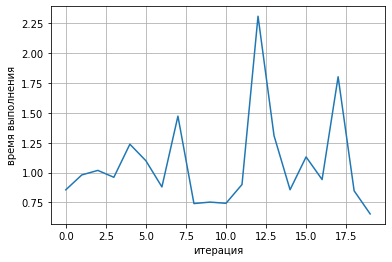

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
timeOfCalculation1 = []
timeOfCalculation2 = []
x = []
for i in range (0,20):
    timeOfCalculation1.append(BigWord()) 
    x.append(i)
    
plt.plot(x,timeOfCalculation1)
plt.xlabel("итерация") # ось абсцисс
plt.ylabel("время выполнения") # ось ординат
plt.grid()

    

## 3 часть (Угадывание фразы c английскими символами)

In [40]:
Data4 = "абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯabcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ "
Phrase4 = "Вчера Приобрёл пятый Iphone"

In [121]:
def EnglishWord():
    OutputPhrase=""
    count=0
    start = time.time()
    #Разбивка слова по 5-кам
    for i in range(0,int(len(Phrase4)/5)-1):
    #     print(Phrase4[5*count:5+5*count])
        OutputPhrase += Life2(Phrase4[5*count:5+5*count],Data4,4,1,True)
        count+=1 
    #Угадывание оставшейся части
    OutputPhrase += Life2(Phrase4[5*(int(len(Phrase4)/5)-1):],Data4,4,1,True)

    end = time.time()
    return end - start
#     print("Время выполнения программы = ", end-start, " c") 
    # print(OutputPhrase)     

# 20 проходов алгоритма фраза с английским словом

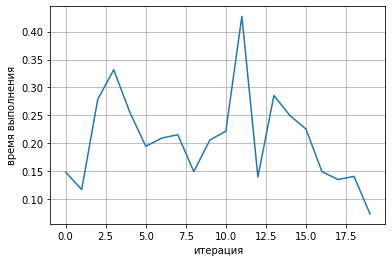

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
timeOfCalculation1 = []
timeOfCalculation2 = []
x = []
for i in range (0,20):
    timeOfCalculation1.append(EnglishWord()) 
    x.append(i)
    
plt.plot(x,timeOfCalculation1)
plt.xlabel("итерация") # ось абсцисс
plt.ylabel("время выполнения") # ось ординат
plt.grid()

    